# Math 761 HW 6: MCMC, Gibbs Sampler, MH

## General Instructions

_This homework requires you two submit two things now and one thing later:_

1) A jupyter notebook (.ipynb file) which will include your code, the results from when you ran the code, and textual interpetations as asked in the questions.

2) A video (15 minute max).  Each question specifies the part you need to explain by video. For example, if part a of question 1 says "**Explain in Video**", then after you have finished writing up your work **(which may include math calculations as well as code)** to your satisfaction (or to the point where you have to submit before the deadline!), please record a video where you go over your work (math and code) and explain what each part of it does and the role each part plays in helping you to achieve the statistical goal of the question. Note that the whole video you submit for your whole assignment should be 10 minutes or less. If your video goes over the max limit, I will only grade or give feedback up to the max limit. This is so that I can give everyone feedback in a timely manner. It may be helpful if you rehearse your video before you record it or use a video editor (Da Vinci is free) to help you keep your video under the time limit while letting you cover all the important information you want to explain.

3) After I give you feedback on the homework, you'll submit your own scoring of your corrected work, where you should also explain why you gave yourself each rubric score. Please submit your corrected work with this.

_This homework also has a metacognitive component that asks you to reflect on your own learning_:
To give you the opportunity and encourage you to reflect on your own work, learn from mistakes, and reward you for improving, for the last two questions of each homework, I will provide you feedback but no grade. Instead, you will be able to take the feedback to improve your work. Then you will self-assess using the rubric provided. This you will simply need to submit before the midterm. There will be a submission link on MyOpenMath for you before then.

<br>

_Grading_:
The two grading rubrics (how I will grade and the rubric you will use to self-assess your improvements) are here https://docs.google.com/document/d/10LMcqYt0DyPNxOYassnZGB6-qAB0KGw_g5j2WHp6-LE/edit?usp=sharing. The grade you will see for this homework will be the grade that I provide on my two questions. However, they are only worth 50% of your HW grade. You will submit your self-assessment (before the midterm), which you should also save for your "portfolio". At the end of the term, we will meet for 5-10 minutes to go over your portfolio so that you can tell me how you evaluate your own improvements and how you graded yourself. Based on this we will come up with the other 50% of your overall HW grade.




<br>

### Exercise 1

**Explain in Video**

Look at Rizzo Example 9.7 (first edition) or 11.10 (second edition) about generating a bivariate normal distribution with correlation -0.75.

We can instead use the ***random scan*** Gibbs sampler, but there is a question about how the random scan affects the burn in period since we are no longer sampling from both coordinates for each step.

a) Try to implement the random scan Gibbs sampler using the same number of burn-ins and saved runs as in the example, and plot the resulting sample.

**hint:** Your plot should look like the one in this link:
https://docs.google.com/document/d/1TgS0zYPy0N0gK0JqVDv6rR9KEvXHbDNZi0-jSs2C2RM/edit?usp=sharing

b) Then experiment with the random scan using different burn-ins but (10*burn-in) for the number of saved runs. What is the size of the burn-in that you need to get a plot similar to what you get for the deterministic scan?


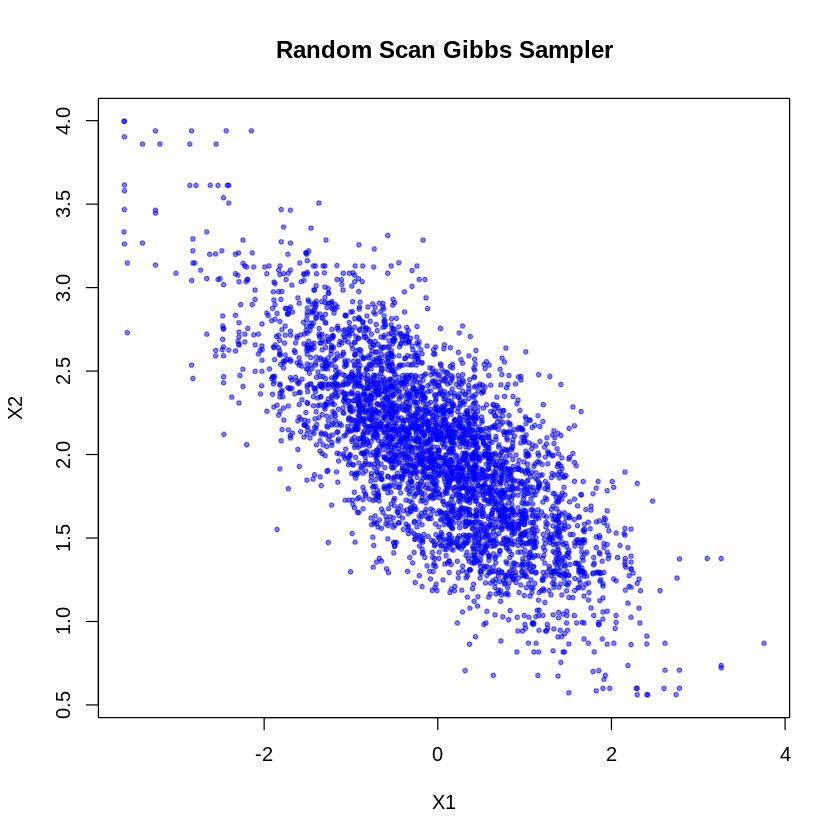

In [ ]:
# Exercise 1A
# Setting the parameters
runs <- 5000           # Iterations
burn <- 1000           # Burn-in
rho <- -0.75           # The correlation between X1 and X2
mu1 <- 0; mu2 <- 2     # Declaring the means of X1 and X2
sigma1 <- 1; sigma2 <- 0.5  # SDs of X1 and X2

# Computing the conditional SD
s1 <- sqrt(1 - rho^2) * sigma1
s2 <- sqrt(1 - rho^2) * sigma2

# Initializing a sample matrix
X <- matrix(0, nrow = runs, ncol = 2)
X[1, ] <- c(mu1, mu2)

# Gibbs sampler
for (i in 2:runs) {
    a <- runif(1)
    if (a < 0.5) {
        x2 <- X[i - 1, 2] # Updating X1 conditional based on X2
        m1 <- mu1 + rho * (x2 - mu2) * sigma1 / sigma2
        X[i, 1] <- rnorm(1, mean = m1, sd = s1)
        X[i, 2] <- X[i - 1, 2]  # Retaining the previous X2
    } else {
        x1 <- X[i - 1, 1] # Updating X2 conditional based on X1
        m2 <- mu2 + rho * (x1 - mu1) * sigma2 / sigma1
        X[i, 2] <- rnorm(1, mean = m2, sd = s2)
        X[i, 1] <- X[i - 1, 1]  # Retaining the previous X1
    }
}

# Removing the burn-in samples
samples <- X[(burn + 1):runs, ]

# Plotting the results
plot(samples, xlab = "X1", ylab = "X2", main = "Random Scan Gibbs Sampler",
     col = rgb(0, 0, 1, 0.5), pch = 19, cex = 0.5)

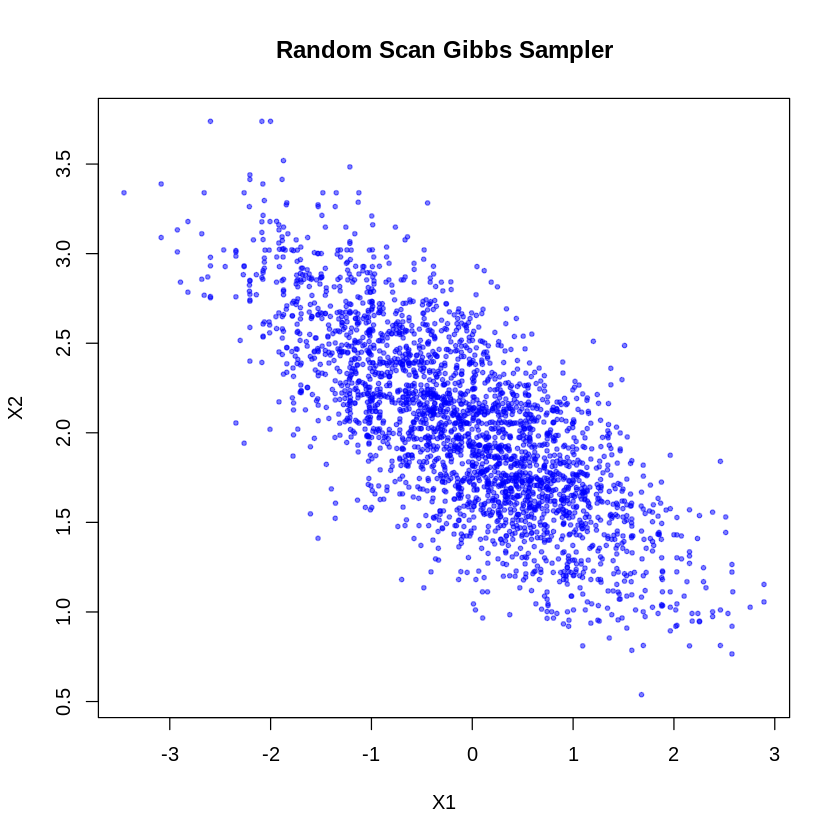

In [2]:
# Exercise 1B
# Setting the parameters
burn <- 300                 # Burn-in
runs <- 10 * burn           # Total number of runs, 10 times the burn-in
rho <- -0.75                # The correlation between X1 and X2
mu1 <- 0; mu2 <- 2          # Declaring the means for X1 and X2
sigma1 <- 1; sigma2 <- 0.5   # SDs for X1 and X2

# Computing the conditional SD
s1 <- sqrt(1 - rho^2) * sigma1
s2 <- sqrt(1 - rho^2) * sigma2

# Initializing a sample matrix
X <- matrix(0, nrow = runs, ncol = 2)
X[1, ] <- c(mu1, mu2)  # Initial values for X1 and X2

# Gibbs sampler
for (i in 2:runs) {
    a <- runif(1)
    if (a < 0.5) {
        x2 <- X[i - 1, 2] # Updating X1 conditional based on X2
        m1 <- mu1 + rho * (x2 - mu2) * sigma1 / sigma2
        X[i, 1] <- rnorm(1, mean = m1, sd = s1)
        X[i, 2] <- X[i - 1, 2]  # Retaining the previous X2
    } else {
        x1 <- X[i - 1, 1] # Updating X2 conditional based on X1
        m2 <- mu2 + rho * (x1 - mu1) * sigma2 / sigma1
        X[i, 2] <- rnorm(1, mean = m2, sd = s2)
        X[i, 1] <- X[i - 1, 1]  # Retaining the previous X1
    }
}

# Removing the burn-in samples
samples <- X[(burn + 1):runs, ]

# Plotting the results
plot(samples, xlab = "X1", ylab = "X2", main = "Random Scan Gibbs Sampler",
     col = rgb(0, 0, 1, 0.5), pch = 19, cex = 0.5)

### Exercise 2

**Explain in Video**

Verify that Gibbs sampling satisfies detailed balance in the sense that sampling from each component conditional on the other components satisfies detailed balance. Without loss of generality, you can assume that we're using the deterministic Gibbs sampler. Please show all your work!

Attached the answer in the PDF with this notebook file

### Exercise 3


**Explain in Video**

Cosider a scenario where 16 people stand in a  4x4 grid $\textbf{X}$ and the Covid status of each person is recorded. One random instance of $\textbf{X}$ is shown below:

![image.png](attachment:image.png)
where the person in the $ith$ row and $jth$ column  is

$$
X_{i, j} =
\begin{cases}
0 & \text{ if they don't have Covid19}\\
1 & \text{ if they have Covid19}
\end{cases}
$$

and the configuration of the grid is determined by the probability model

$$
P\{X = x\} = \frac{e^{\beta h}}{NC},
$$

where $\beta>0$ is a constant; $NC$ is a normalizing constant that makes the total probability sum to 1; and $H(\textbf{X}) = h$ is the sum of number of neighbors each person has (up, down, left, right) that share the same health status. If a person is on an edge or corner, then they may not have some of these neighbors. In the example of
$\textbf{X}$ shown above, $h(\textbf{X}) = 24$ because

| $X_{i,j}$    | Number of same-status neighbors |
|-------------|---------------------------------|
| $X_{1,1}$   | 0                               |
| $X_{1,2}$   | 2                               |
| $X_{1,3}$   | 2                               |
| $X_{1,4}$   | 2                               |
| $X_{2,1}$   | 1                               |
| $X_{2,2}$   | 3                               |
| $X_{2,3}$   | 1                               |
| $X_{2,4}$   | 1                               |
| $X_{3,1}$   | 1                               |
| $X_{3,2}$   | 1                               |
| $X_{3,3}$   | 3                               |
| $X_{3,4}$   | 1                               |
| $X_{4,1}$   | 2                               |
| $X_{4,2}$   | 2                               |
| $X_{4,3}$   | 2                               |
| $X_{4,4}$   | 0                               |
| $sum$ | 24                              |

To be extra clear, we get the numbers in the table like so:  the person in the 2nd row and 3rd column is $X_{2,3}$ and has status 0. If we look above, below, left, and right (exclude diagonals) of this person, there is only one other person who shares the same Covid status of 0 ($X_{3,3}$). Therefore the number of same-status neighbors $X_{2,3}$ is 1. We tally up the same-status neighbors for each person in the grid and that value is  $h(\bf{X})$.

Now our goal is to estimate $P\{H(\textbf{X})\leq 11\}.$ You can probably tell that it is difficult to generate a bunch of 4x4 grids $\textbf{X}$ directly in order to then calculate what proportion of times $H({X})$ is less than 11. So we will use Gibbs sampling instead to swap between {0,1} status for each person $X_{i,j}$ in turn.


a) First, figure out what the conditional probability is for any $X_{i,j}$ to be 0 or 1 by finding the conditional probability of $P\{\textbf{X}=x|X_{-i,-j}\}$, where the given $X_{-i,-j}$ represents the fixed covid-statuses of everyone except the (i,j)th person, that is, the rest of the matrix is fixed besides $X_{i, j}$. Hint: $h$ can only take on two different values.


b) Create a deterministic Gibbs sampler using a burn-in of 1000 and $\beta=1/4$. For your results, try to estimate  $P\{\textbf{H(X)}\leq 11\};$  $P\{\textbf{H(X)}\leq 15\}$ ; and  $P\{\textbf{H(X)}\leq 20\}$ using 50 replications of your MCMC code. Report in one table the mean and se for each estimate over the 50 replications. (Thank you!)

**hint:** When I set the seed to 1, I get `0.030442` for my estimate of $P(H(X) \leq 20)$. Your value should be pretty close even if it isn't the same because you sampled a little differently.

Exercise 3A : Attached the answer in the PDF with this notebook file

In [ ]:
# Exercise 3B
# Setting the given beta value
beta <- 1 / 4

# Function to calculate 'h' for a given matrix
calculate_h <- function(matrix) {
  h_value <- 0
  for (i in 1:nrow(matrix)) {
    for (j in 1:ncol(matrix)) {
      if (i > 1 && matrix[i, j] == matrix[i - 1, j]) h_value <- h_value + 1
      if (i < nrow(matrix) && matrix[i, j] == matrix[i + 1, j]) h_value <- h_value + 1
      if (j > 1 && matrix[i, j] == matrix[i, j - 1]) h_value <- h_value + 1
      if (j < ncol(matrix) && matrix[i, j] == matrix[i, j + 1]) h_value <- h_value + 1
    }
  }
  return(h_value)
}

# Function to calculate the conditional probabilities
conditional_probabilities <- function(matrix, i, j, beta) {
  original_value <- matrix[i, j]

  # Calculate h value for Xij_ = 0
  matrix[i, j] <- 0
  h_0 <- calculate_h(matrix)

  # Calculate h value for Xij_ = 1
  matrix[i, j] <- 1
  h_1 <- calculate_h(matrix)

  # Resetting to the original value
  matrix[i, j] <- original_value

  # Computing the probabilities
  prob_0 <- exp(beta * h_0) / (exp(beta * h_0) + exp(beta * h_1))
  prob_1 <- exp(beta * h_1) / (exp(beta * h_0) + exp(beta * h_1))

  return(c(prob_0, prob_1))
}

# Gibbs
gibbs_sampler <- function(iterations, burn_in, beta) {
  # Initializing a matrix with random 0s and 1s
  matrix <- matrix(sample(c(0, 1), size = 16, replace = TRUE), nrow = 4, ncol = 4)
  results <- numeric(iterations)

  for (k in 1:(iterations + burn_in)) {
    for (i in 1:4) {
      for (j in 1:4) {
        probs <- conditional_probabilities(matrix, i, j, beta) # Get conditional probabilities for the current cell
        matrix[i, j] <- sample(c(0, 1), size = 1, prob = probs) # Sampling a new state based on the probabilities
      }
    }
    # Recording the h value after the burn-in
    if (k > burn_in) {
      results[k - burn_in] <- calculate_h(matrix)
    }
  }

  return(results)
}

# Function to estimate probabilities and standard errors
estimate_probabilities <- function(results, thresholds) {
  estimates <- sapply(thresholds, function(threshold) mean(results <= threshold))
  se <- sapply(thresholds, function(threshold) sqrt(var(results <= threshold) / length(results)))

  return(data.frame(threshold = thresholds, estimate = estimates, se = se))
}

# Running Gibbs and calculating estimates
set.seed(123)
gibbs_results <- gibbs_sampler(iterations = 50, burn_in = 1000, beta = beta)

# Defining the thresholds and calculating estimates
thresholds <- c(11, 15, 20)
prob_estimates <- estimate_probabilities(gibbs_results, thresholds)

# Printing results
print(prob_estimates)

  threshold estimate   se
1        11     0.00 0.00
2        15     0.00 0.00
3        20     0.02 0.02


### Exercise 4


**Explain in Video**

We can actually use the MH sampler to carry out sampling in the 4x4 gride model. For this, use a proposal distribution that uniformly picks 1 amongst all the people on the grid and uniformly chooses a 0 or 1 health status for that person, that is

$$ g(X_{t+1}|X_{t}) = g(X_{t+1}) = \frac{1}{16*2}.
$$

a) Calculate the acceptance probability

b) Then estimate  $P\{H(\textbf{X})\leq 11\};$  $P\{H(\textbf{X})\leq 15\}$ ; and  $P\{H(\textbf{X})\leq 20\}$ using 50 replications of your MCMC code using the MH sampler. Report in one table the mean and se for each estimate over the 50 replications.

**hint:** When I set the seed to 1, I get `0.030986` for $P(H(X) \leq 20)$. Your value should be pretty close even if it isn't the same because you sampled a little differently.

Exercise 4A : Attached the answer in the PDF with this notebook file

In [1]:
# Exercise 4B
# Setting the beta value and thresholds
beta <- 1 / 4
thresholds <- c(11, 15, 20)

# Function to calculate the h value
calculate_h <- function(grid) {
  h_value <- 0
  for (i in 1:nrow(grid)) {
    for (j in 1:ncol(grid)) {
      # Checking the neighbors in all directions
      if (i > 1 && grid[i, j] == grid[i - 1, j]) h_value <- h_value + 1
      if (i < nrow(grid) && grid[i, j] == grid[i + 1, j]) h_value <- h_value + 1
      if (j > 1 && grid[i, j] == grid[i, j - 1]) h_value <- h_value + 1
      if (j < ncol(grid) && grid[i, j] == grid[i, j + 1]) h_value <- h_value + 1
    }
  }
  return(h_value)
}

# Function for the MH step
mh_step <- function(grid) {
  for (i in 1:nrow(grid)) {
    for (j in 1:ncol(grid)) {
      original_value <- grid[i, j]

      # Calculating the h values for both current and proposed states
      h_current <- calculate_h(grid)
      grid[i, j] <- 1 - original_value
      h_proposed <- calculate_h(grid)

      # Calculating the acceptance probability
      acceptance_prob <- exp(beta * (h_proposed - h_current))

      # Accept or reject new state
      if (runif(1) < acceptance_prob) {
        grid[i, j] <- 1 - original_value  # Accepting the proposed state
      } else {
        grid[i, j] <- original_value  # Reject and revert back to the previous state
      }
    }
  }
  return(grid)
}

# Initializing the grid and setting the parameters
set.seed(1)
initial_grid <- matrix(sample(c(0, 1), size = 16, replace = TRUE), nrow = 4, ncol = 4)
burn_in <- 100
runs <- 10 * burn_in
samples <- numeric(runs)
current_grid <- initial_grid

# Burn-in period
for (b in 1:burn_in) {
  current_grid <- mh_step(current_grid)
}

# Sampling period
for (r in 1:runs) {
  current_grid <- mh_step(current_grid)
  samples[r] <- calculate_h(current_grid)
}

# Calculating the estimates and standard errors
results <- data.frame(threshold = thresholds, estimate = NA, se = NA)
for (i in seq_along(thresholds)) {
  threshold <- thresholds[i]
  indicator <- samples <= threshold
  results$estimate[i] <- mean(indicator)
  results$se[i] <- sd(indicator) / sqrt(length(indicator))
}

# Displaying the results
print(results)

  threshold estimate          se
1        11    0.000 0.000000000
2        15    0.001 0.001000000
3        20    0.034 0.005733836


### Remember please
to do your self-reflection (see rubric) where you assess which work you have done where you have a stronger understanding about and which you are less confident in.